# Homework w08d02

Repeat the analysis from the lab for different states. 
1. Choose poll and election results from three different states. 
2. For each state, obtain the posterior probability distribution for the probability of people voting for Bush based on the polls for a prior Beta distribution and the election results for a binomial likelihood function. 
3. Plot the cumulative distribution function of the posterior probability.

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
from scipy import stats

In [2]:
# Reading in the csv file
pre_poll = pd.read_csv('datasets/polls.csv')

# The first column "Unnamed" is clearly just a row-identifer machine generated. We can ignore that column or drop it all together
del pre_poll['Unnamed: 0']
del pre_poll['org']
pre_poll.head()

,year,survey,bush,state,edu,age,female,black,weight
0,1,9152,1.0,7,2,2,1,0,1403
1,1,9152,1.0,33,4,3,0,0,778
2,1,9152,0.0,20,2,1,1,0,1564
3,1,9152,1.0,31,3,2,1,0,1055
4,1,9152,1.0,18,3,1,1,0,1213


In [3]:
# Let's also produce a dictionary with the general poll percentages for state (no age)

container2 ={}
for state in pre_poll['state'].unique(): 
    c1 = pre_poll['state'] == state
    subset_interest = pre_poll[c1]  # Subsetting the data 
    contain = subset_interest['bush'].unique()  
    contain = contain[~np.isnan(contain)]   # Remove the NaNs - Think why can't we use dropna()?
        
    if len(contain) == 2:
        bush_quotient = float(subset_interest['bush'].value_counts()[1])/(float(subset_interest['bush'].value_counts()[1])+float(subset_interest['bush'].value_counts()[0]))
        temp_name = str(state)
        container2[temp_name] = bush_quotient

In [4]:
election88_dat = pd.read_csv('datasets/election88.csv')
del election88_dat["Unnamed: 0"]
election88_dat.head()

,stnum,st,electionresult,samplesize,ranking,_merge
0,1,AL,0.59,203,0.673067,3
1,2,AK,0.60,0,NaN,1
2,3,AZ,0.60,194,0.568980,3
3,4,AR,0.56,121,0.563672,3
4,5,CA,0.51,1493,0.531725,3


In [5]:
df_polls = pd.DataFrame(
    {'stnum': container2.keys(),'poll': container2.values()})
df_polls['stnum'] = df_polls.stnum.astype(int)
df_polls.shape

(48, 2)

In [6]:
df_polls.sort_values(by='stnum').head()

,poll,stnum
21,0.710692,1
22,0.589286,3
24,0.584158,4
23,0.570312,5
26,0.593103,6


In [7]:
election88_dat = election88_dat[['stnum','st','electionresult','samplesize']]
election88_dat = election88_dat.merge(df_polls,left_on='stnum',right_on='stnum',how='left')
election88_dat.dropna(inplace=True)

election88_dat['result_persons'] = np.round(
    election88_dat.electionresult*election88_dat.samplesize)
election88_dat['poll_persons'] = np.round(
    election88_dat.poll*election88_dat.samplesize)
election88_dat['result_persons'] = election88_dat.result_persons.astype(int)
election88_dat['poll_persons'] = election88_dat.poll_persons.astype(int)

In [15]:
election88_dat

,stnum,st,electionresult,samplesize,poll,result_persons,poll_persons
0,1,AL,0.59,203,0.710692,120,144
2,3,AZ,0.60,194,0.589286,116,114
3,4,AR,0.56,121,0.584158,68,71
4,5,CA,0.51,1493,0.570312,761,851
5,6,CO,0.53,181,0.593103,96,107
6,7,CT,0.52,171,0.529851,89,91
7,8,DE,0.56,39,0.378378,22,15
9,10,FL,0.61,750,0.638066,458,479
10,11,GA,0.60,316,0.587121,190,186
12,13,ID,0.62,42,0.500000,26,21


In [9]:
list_post = []
for s in election88_dat.stnum:
    data = (election88_dat[election88_dat.stnum==s])
    state = data.values[0,1]
    n = data.values[0,3]
    k = data.values[0,5]
    alpha_p = data.values[0,6]
    beta_p = n-alpha_p
    a = k+alpha_p
    b = n-k+beta_p
    list_post.append((state,a,b,alpha_p,beta_p))

In [10]:
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k','#eeefff')
def func_plot(values,my_list):
    i = 0
    for post in my_list:
        plt.plot(values,beta.cdf(values,post[1],post[2]),'-',color=colors[i%8],linewidth=3,label=post[0])
        plt.plot(values,beta.cdf(values,post[3],post[4]),'--',color=colors[i%8],linewidth=3)
        plt.legend(loc='upper left',fontsize=20)
        plt.xlabel('x',fontsize=20)
        plt.ylabel('P(theta <x)',fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        i += 1

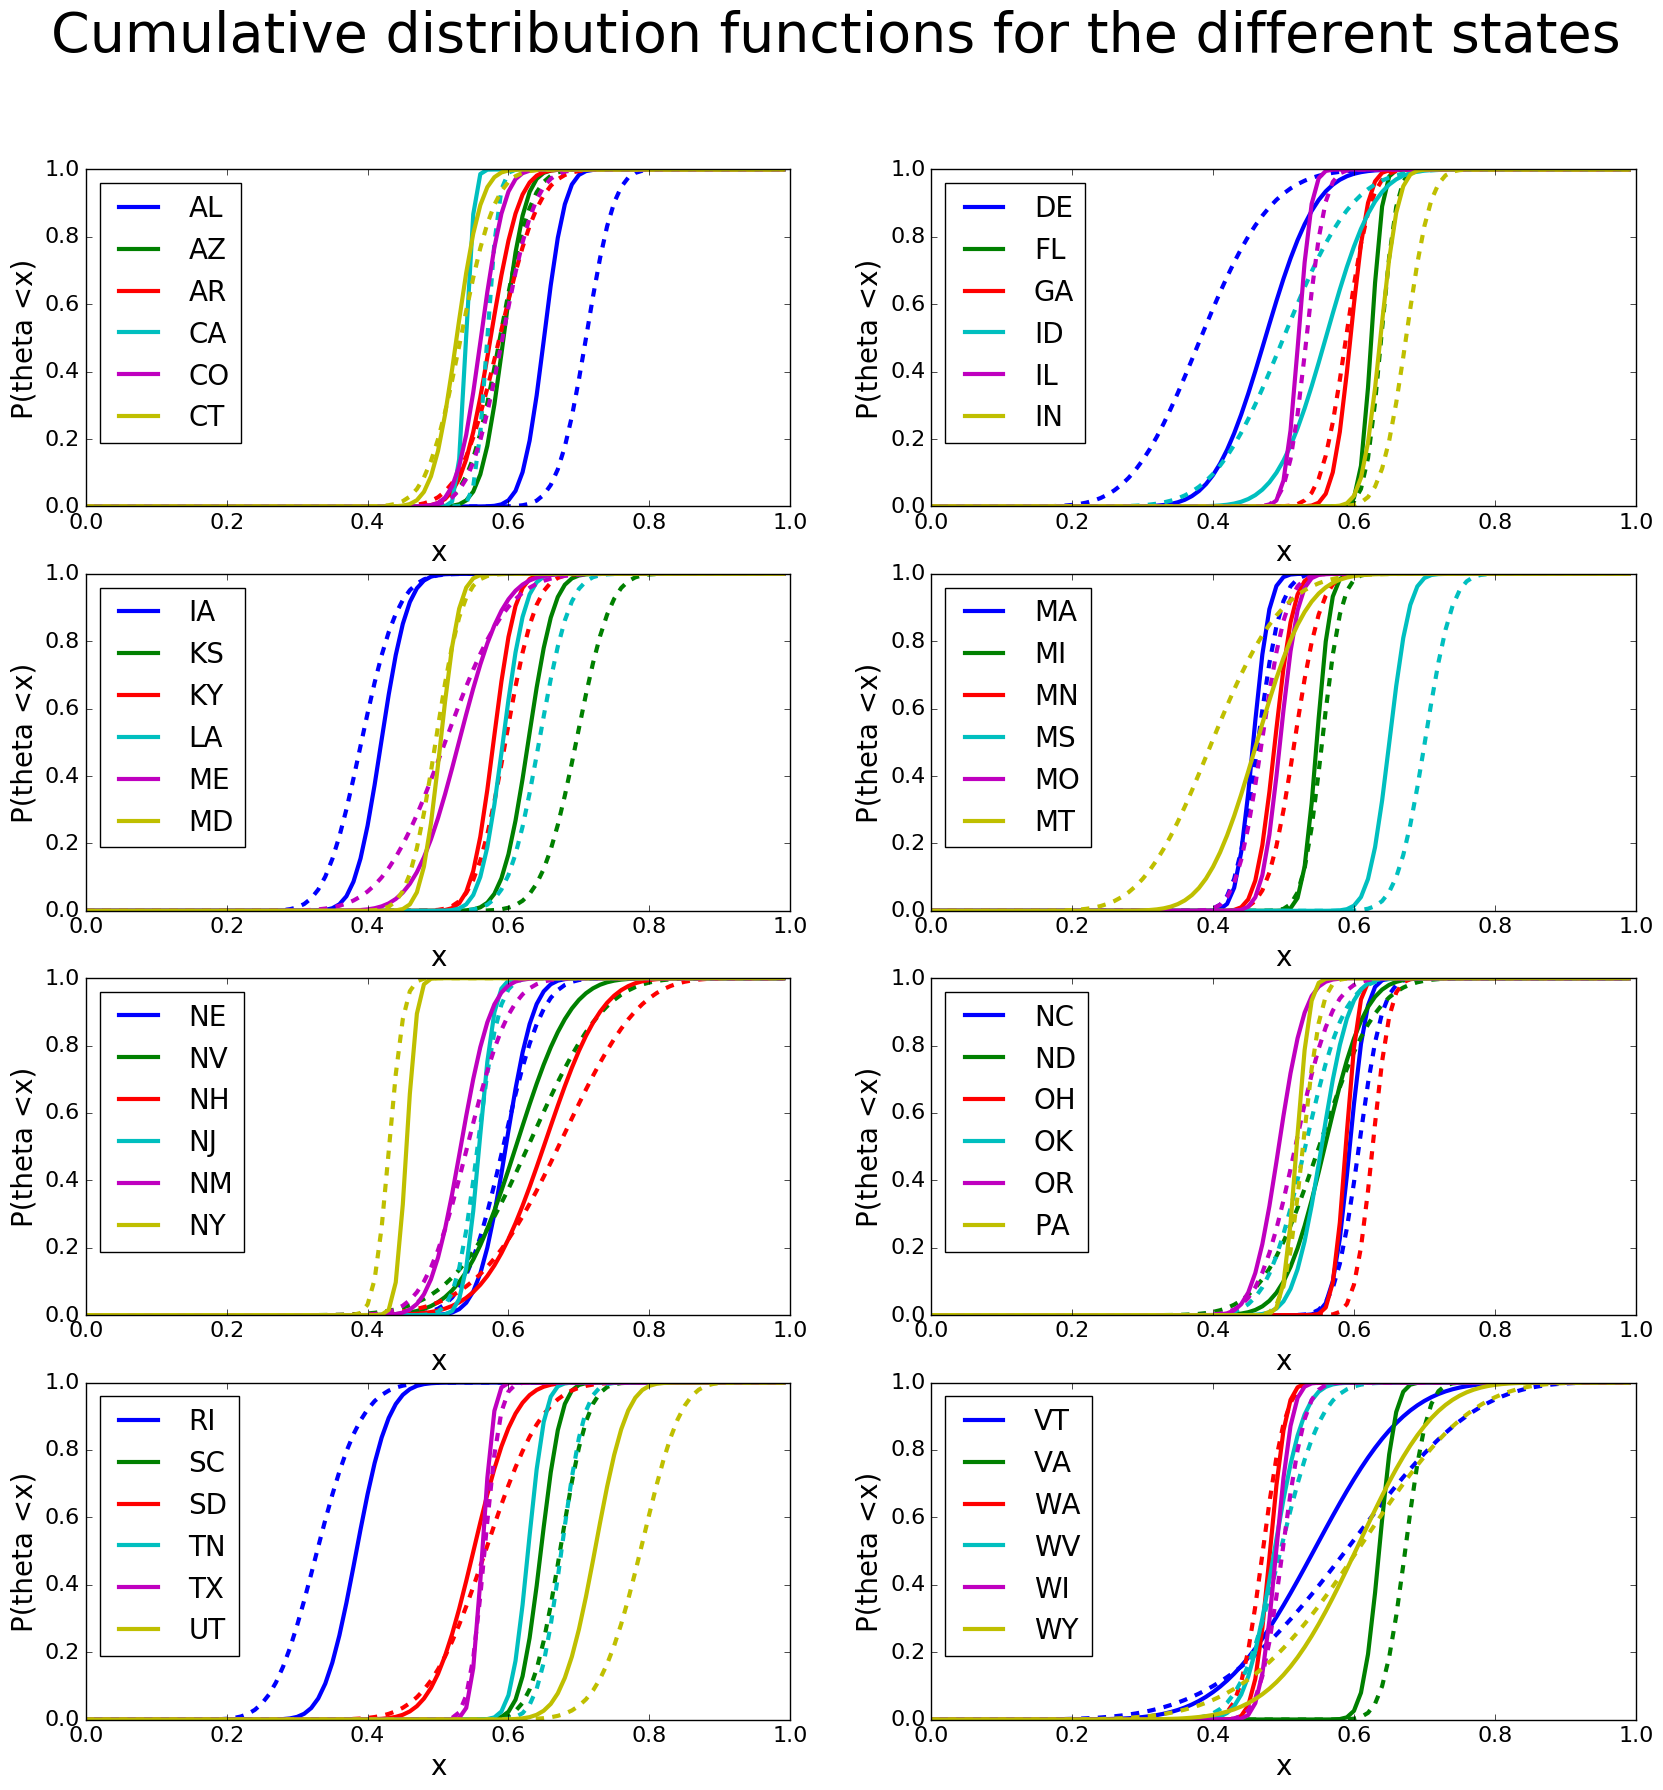

In [11]:
colors = ('b', 'g', 'r', 'c', 'm', 'y', 'k','#eeefff')
plt.figure(figsize=(20,20))
plt.suptitle('Cumulative distribution functions for the different states', 
             fontsize=40)
values = np.arange(0,1,0.01)
j = np.array([0,6])
for i in range(8):
    j1 = j + i*6
    plt.subplot(4, 2, i+1)
    func_plot(values,list_post[j1[0]:j1[1]])
    
plt.show()

In [12]:
def func_plot_1(values,my_list):
    i = 0
    for post in my_list:
        list_prob = []
        list_prob_1 = []
        for n in range(100):
            list_prob.append(beta.cdf(0.01*(n+1),post[1],post[2])
                     -beta.cdf(0.01*n,post[1],post[2]))
            list_prob_1.append(beta.cdf(0.01*(n+1),post[3],post[4])
                     -beta.cdf(0.01*n,post[3],post[4]))

        plt.plot(values,list_prob,'-',color=colors[i%8],linewidth=3,label=post[0])
        plt.plot(values,list_prob_1,'--',color=colors[i%8],linewidth=3)
        plt.legend(loc='upper left',fontsize=20)
        plt.xlabel('Percentage pro Bush',fontsize=20)
        plt.ylabel('Posterior Probability',fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        i += 1

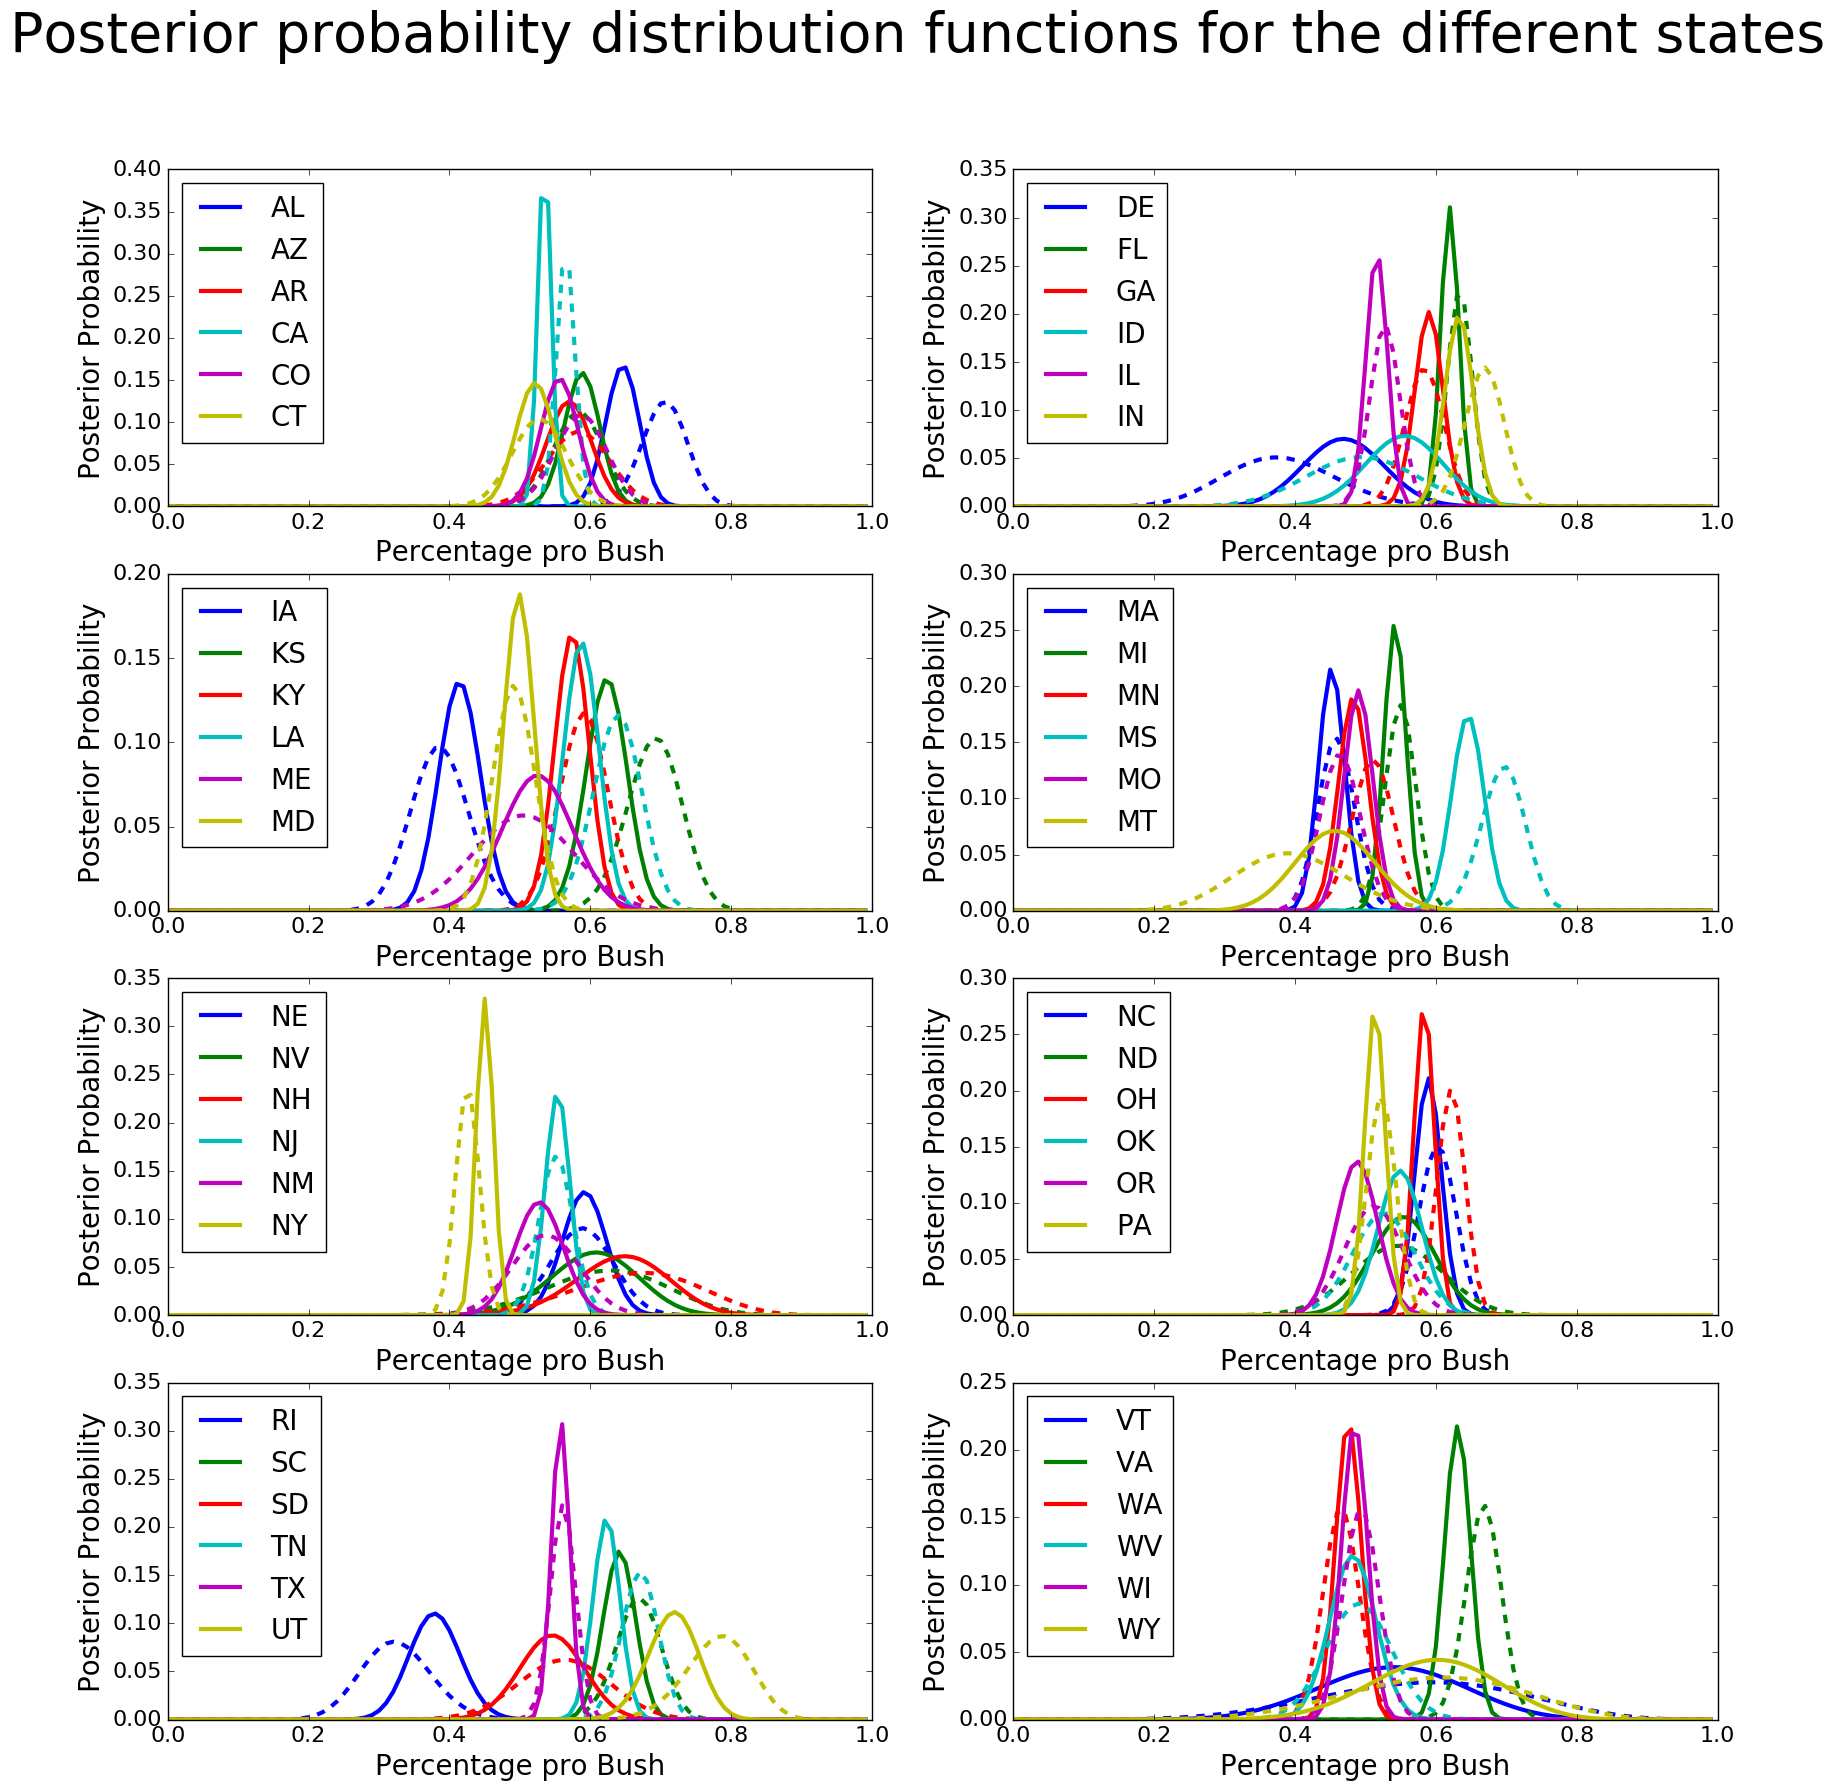

In [13]:
plt.figure(figsize=(20,20))
plt.suptitle('Posterior probability distribution functions for the different states', 
             fontsize=40)
values = np.arange(0,1,0.01)
j = np.array([0,6])
for i in range(8):
    j1 = j + i*6
    plt.subplot(4, 2, i+1)
    func_plot_1(values,list_post[j1[0]:j1[1]])
    
plt.show()